<a href="https://colab.research.google.com/github/tstakuma/git-practice/blob/main/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

主成分分析
→次元削減に用いられる多変量解析

＝＝データの次元数を削減する

可能な限り元のデータの情報を保持したまま、低次元のデータに変換

主成分分析の活用ケース


*   データを可視化したいケース
*   データ量を削減したいケース



データを可視化したいケース

それぞれの主成分ごとの特徴の定義の言語化は人間が行う

データ量を削減したいケース

機械学習などでよく使用される
→コスト（時間、費用）を削減できる

※主成分分析と重回帰分析を組み合わせたPLS(Partial Least Squares regression)という手法も存在する 

主成分分析が生成されるイメージ
  ２次元→１次元

主成分分析では「分散が大きい」＝＝「情報量が多い」

In [9]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 39.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 10

In [12]:
df = pd.read_csv('academic_ability.csv')
df.head(3)

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
0,2,3,4,3,3,4,3,2,3,2
1,5,4,3,3,3,2,4,3,4,5
2,3,3,3,4,3,4,3,4,4,3


In [13]:
df.shape

(40, 10)

In [14]:
df.describe()

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,3.450000,3.400000,3.400000,3.375000,3.350000,3.325000,3.450000,3.475000,3.550000,3.525000
std,1.197219,1.172331,1.215287,1.102154,1.098951,1.288758,0.985797,1.085747,1.060962,1.320208
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.750000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,4.250000,4.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


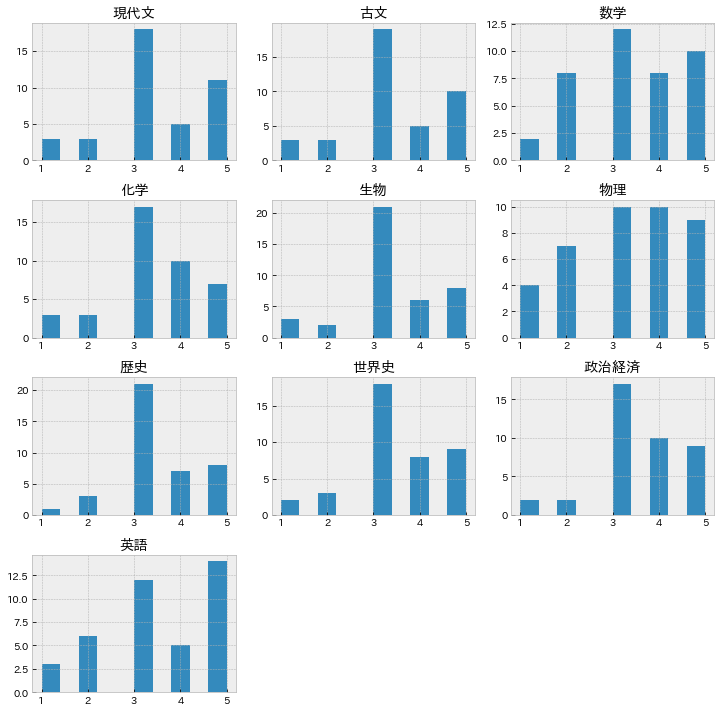

In [15]:
df.hist()
plt.tight_layout()

※ヒストグラムを見るときは軸がグラフ毎に違う場合があることに注意

主成分分析は結果的に相関の強い変数を相関の弱い独立した変数で表現する

＝＝相関が強い変数は似ているため、まとめて少ない変数で表現できる

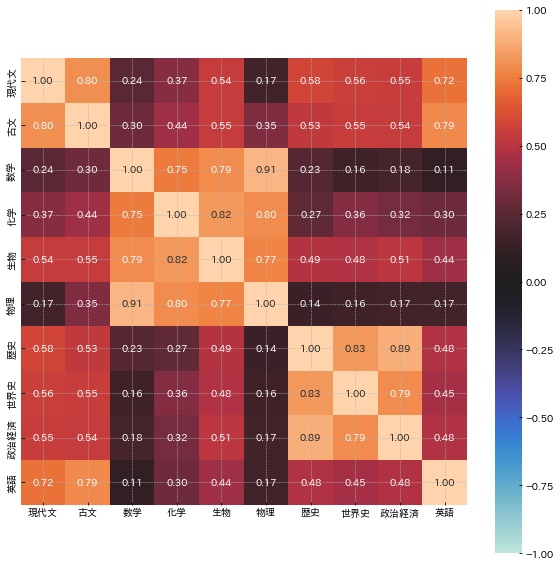

In [16]:
sns.heatmap(df.corr(), annot = True, square = True, vmax=1, vmin=-1, center=0, fmt='.2f');

主成分分析を行う際には重回帰分析と同様に、
データの標準化が必須

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
scaled_values = scaler.fit_transform(df)

In [21]:
df_scaled = pd.DataFrame(scaled_values, columns=df.columns)
df_scaled.head()

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
0,-1.226569,-0.345547,0.500000,-0.344577,-0.322543,0.530432,-0.462299,-1.375819,-0.525001,-1.169837
1,1.311160,0.518321,-0.333333,-0.344577,-0.322543,-1.041219,0.565032,-0.443060,0.429547,1.131481
2,-0.380659,-0.345547,-0.333333,0.574295,-0.322543,0.530432,-0.462299,0.489698,0.429547,-0.402731
3,1.311160,1.382189,-0.333333,-0.344577,-0.322543,-0.255393,0.565032,0.489698,0.429547,1.131481
4,0.465250,-0.345547,0.500000,1.493168,0.599008,-0.255393,-0.462299,-0.443060,0.429547,-0.402731


主成分分析はscikit-learnのdecompositionにPCAというクラス名で保存されている


引数	効果
n_components	生成する主成分の数
random_state	裏側で使用される乱数の固定


In [22]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0)

In [23]:
feature = pca.fit_transform(df_scaled)

In [24]:
feature.shape

(40, 10)

結果の確認　主成分（主成分得点）

In [25]:
pd.DataFrame(
    feature,
    columns=[f'PC{x+1}' for x in range(len(df.columns))]
).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.582937,1.522060,0.319377,-0.680331,-0.471073,0.310012,-0.562323,0.062166,-0.312301,-0.076888
1,-0.537827,-1.654101,-1.080071,-0.613575,0.194434,-0.690422,-0.164876,0.479087,-0.037316,0.212635
2,0.107779,0.336046,0.608438,0.895810,-0.093421,0.212990,-0.346491,0.051084,0.624242,-0.164918
3,-1.339368,-1.645856,-1.095151,-0.272281,0.063357,0.447164,-0.099699,0.211740,0.128337,-0.032590
4,-0.518339,0.969427,0.078046,0.495261,0.818791,-1.029864,-0.726044,0.225064,-0.002689,0.476964


この１行ずつが１サンプルずつのデータを表している
各主成分より新しく生成された主成分得点が格納されいている

主成分分析は値を算出して終わりではなく、その出力に対して解釈を行う

結果の解釈

*   寄与率・累積寄与率
*   主成分負荷量


主成分分析の結果を評価する方針
→次元削減後のデータが元のデータをどのくらい表現できているか

どのくらい元データを表現できているかを定量的に測る値

＝＝寄与率

第一主成分から累積的に足したもの

＝＝累積寄与率

70～80%以上が目安

In [26]:
pca.explained_variance_ratio_

array([0.54174516, 0.23323638, 0.10293608, 0.03053852, 0.02943854,
       0.02358926, 0.01646657, 0.01096772, 0.00718357, 0.0038982 ])

  arrayのままだと見にくいのでPandasのDataFramwを使用する

In [35]:
variance_ratio = pca.explained_variance_ratio_

pd.DataFrame(
    variance_ratio,
    index = [f'PC{x+1}' for x in range(len(variance_ratio))],
    columns=['寄与率']
)

,寄与率
PC1,0.541745
PC2,0.233236
PC3,0.102936
PC4,0.030539
PC5,0.029439
PC6,0.023589
PC7,0.016467
PC8,0.010968
PC9,0.007184
PC10,0.003898


累積寄与率が第二主成分までで77%を超えているため、

比較的うまく元のデータを表現できていると評価できる

AttributeError: ignored

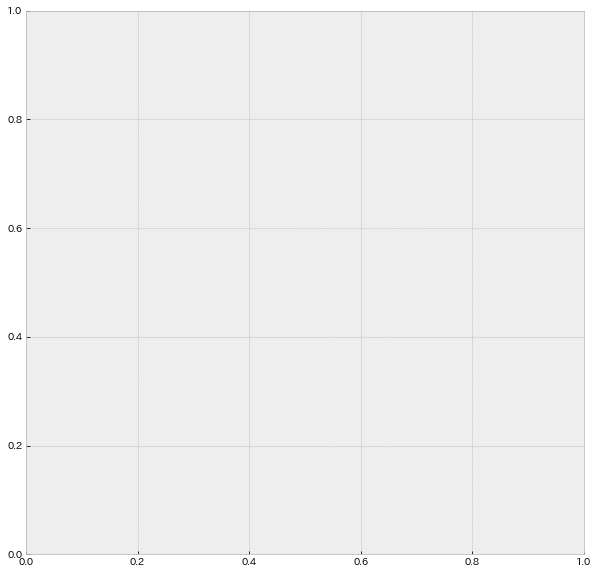

In [39]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocMator(integer=True))
plt.plot([0] + list(np.cumsum(variance_ratio,)), '-o')
plt.xlabel('主成分')
plt.ylabel('累積寄与率')
plt.show()

結果の解釈　主成分負荷量

主成分分析では新たな背変数を作成している
ー この新たな変数がどのような意味があるのかを判断する必要がある
ー＞ 主成分負荷量を使用する

「固有ベクトル＝主成分係数」によって主成分負荷量を算出

固有値＝各主成分の分散の大きさ

固有ベクトル＝分散が最大になる方向

In [45]:
eigenvector = pca.components_
pd.DataFra
me(eigenvector,
             index = [f'PC{x+1}' for x in range(len(eigenvector))],
              columns = df_scaled.columns)

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
PC1,-0.330471,-0.345861,-0.264372,-0.312252,-0.371225,-0.261427,-0.323972,-0.318760,-0.324065,-0.293324
PC2,-0.215454,-0.147589,0.472686,0.354349,0.251609,0.487920,-0.285686,-0.265534,-0.272543,-0.234572
PC3,-0.352338,-0.418284,0.084606,0.002393,0.044721,0.009705,0.392747,0.363047,0.384869,-0.507406
PC4,-0.256860,-0.011623,-0.459995,0.638958,-0.038767,-0.059016,-0.333653,0.426382,-0.060221,0.110849
PC5,0.678160,-0.079317,0.037859,0.170128,0.095616,-0.298730,-0.100190,0.184604,-0.262602,-0.540345
PC6,-0.142910,0.578022,0.113232,-0.239358,-0.388621,0.305380,-0.043586,0.426987,-0.240359,-0.298462
PC7,-0.025355,-0.408031,0.181340,-0.216001,0.116020,-0.002665,0.171988,0.450016,-0.588067,0.402421
PC8,0.119172,-0.123452,0.172296,0.451003,-0.700474,0.017178,0.433175,-0.186758,-0.117271,0.101179
PC9,0.352286,-0.389237,0.057152,-0.171071,-0.340150,0.399963,-0.461027,0.201125,0.379757,0.137742
PC10,-0.187015,0.099325,0.638617,0.055701,-0.124042,-0.589273,-0.325801,0.141556,0.196033,0.130320


主成分負荷量は↑の固有ベクトルに、固有値を平方根をかけ合わせて求める
固有値は各主成分の分散の大きさを表している
平方根を取ることで、元のスケールに変換するイメージ

固有値は.explaned_variance_で取得できる

In [52]:
factor_loading = pca.components_ *np.c_[np.sqrt(pca.explained_variance_)]
df_factor_loading = pd.DataFrame(factor_loading,
                                 index=[f'PC{x+1}' for x in range(len(factor_loading))],
                                 columns=df_scaled.columns)
df_factor_loading.head(3)

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
PC1,-0.778985,-0.815262,-0.623175,-0.736037,-0.875048,-0.616234,-0.763665,-0.751380,-0.763885,-0.691421
PC2,-0.333235,-0.228270,0.731086,0.548058,0.389155,0.754649,-0.441860,-0.410692,-0.421533,-0.362804
PC3,-0.362027,-0.429786,0.086932,0.002459,0.045950,0.009972,0.403547,0.373031,0.395452,-0.521359


値の影響度合いは絶対値で見る

絶対値的に大きいほど元の変数に影響していると判断する

正負の違いは同じ主成分での方向性の違い
）今回は第２主成分で、文型科目は負、理系科目は正

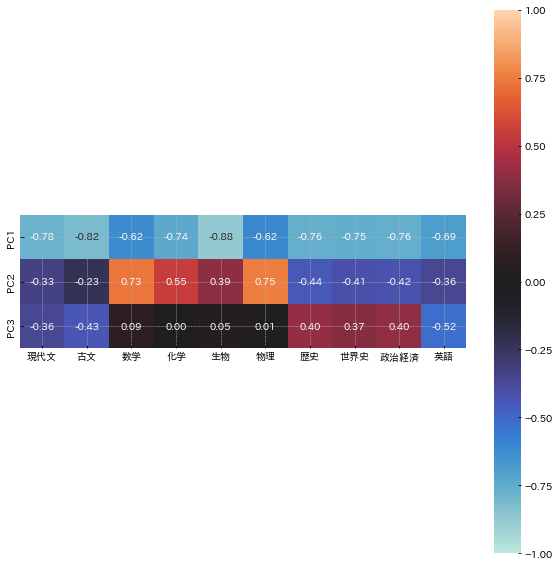

In [55]:
sns.heatmap(df_factor_loading.head(3), vmax = 1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt = '.2f');

主成分に適切な定義を定めることによって以後解釈をしやすくする

＝主成分ごとにどのような軸か定義分けをする

解釈のための可視化

固有ベクトルをもとに可視化することで軸をより解釈しやすくする

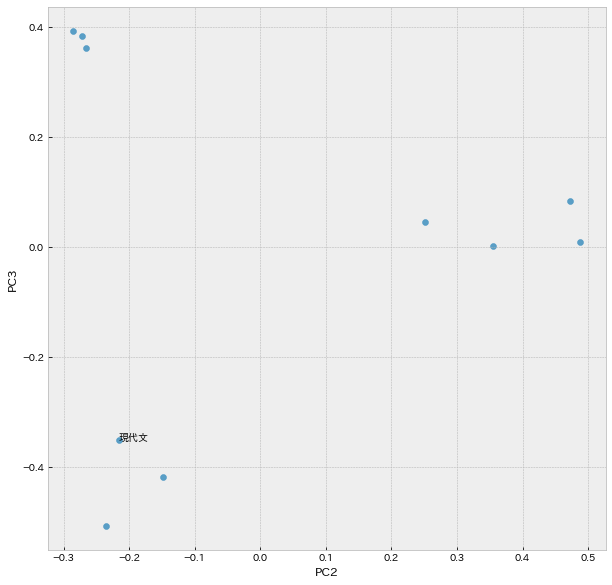

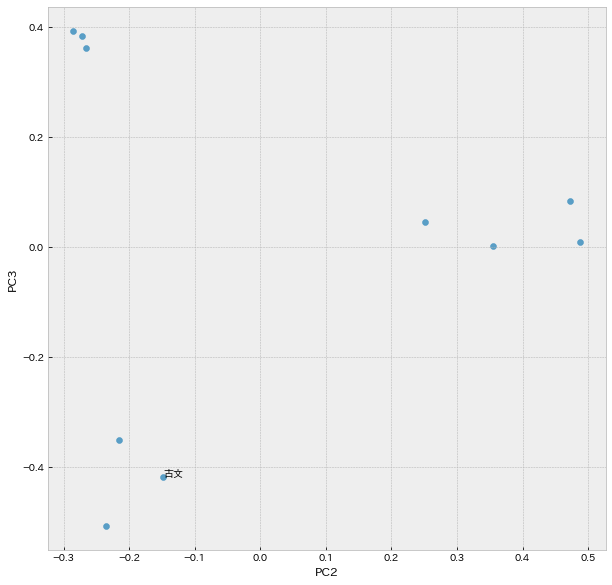

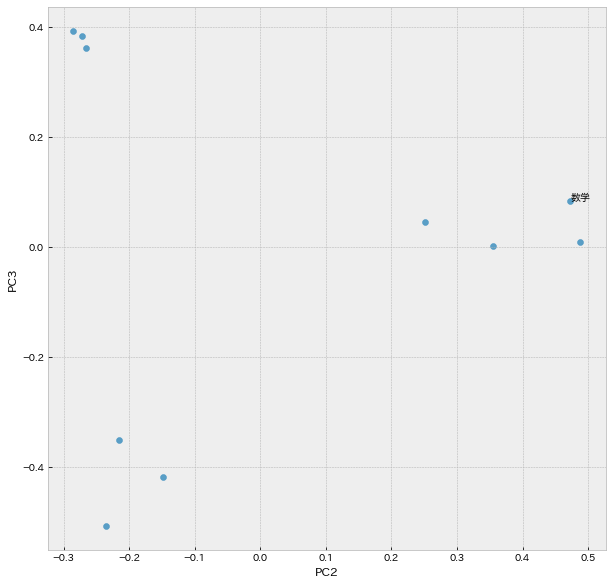

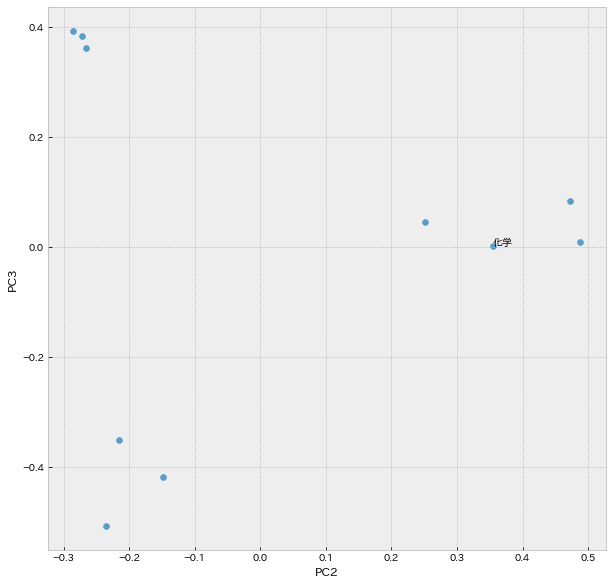

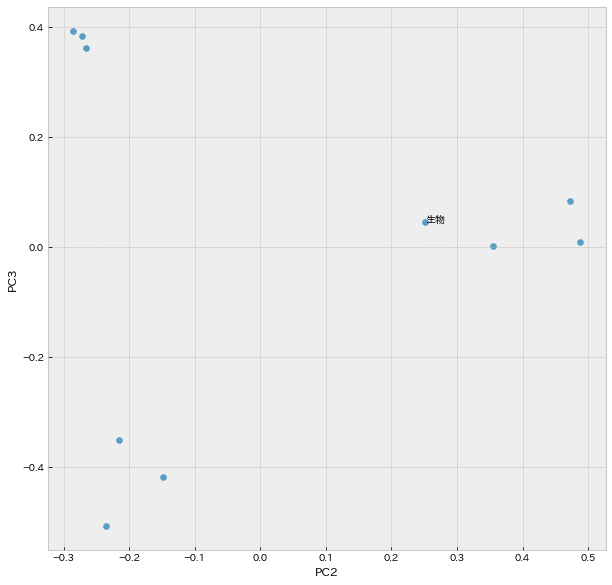

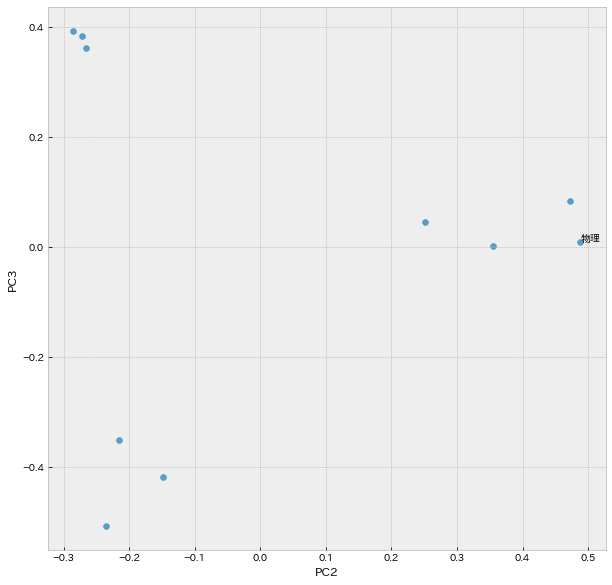

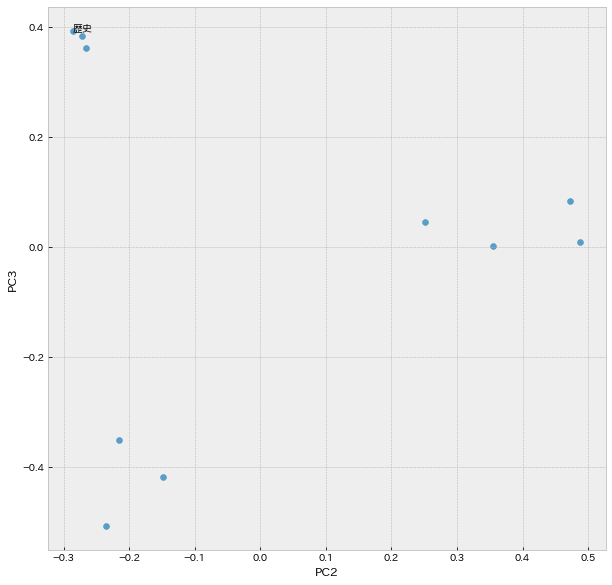

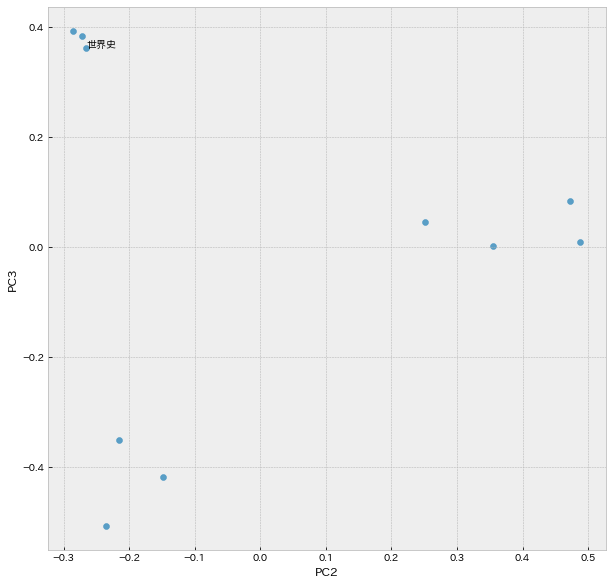

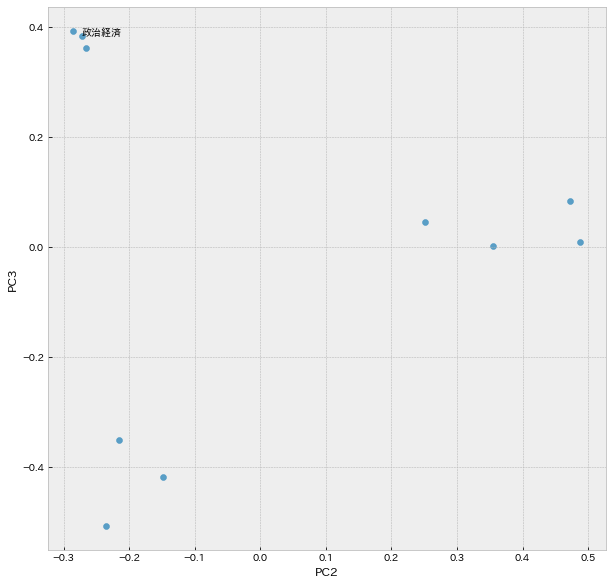

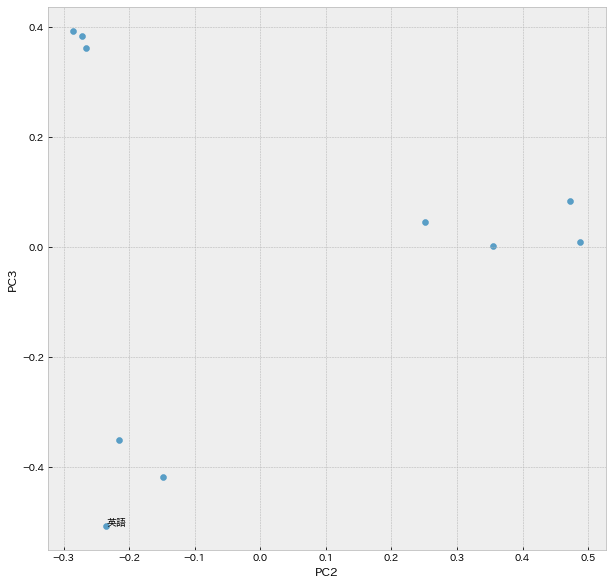

In [56]:
for x, y, name in zip(pca.components_[1], pca.components_[2], df.columns):
  plt.text(x,y,name)
  plt.scatter(pca.components_[1],pca.components_[2], alpha=0.8)
  plt.xlabel('PC2')
  plt.ylabel('PC3')
  plt.show()

主成分分析の結果の可視化

ここまでの流れ

ー 主成分分析を用いて変数を削減
→新たに生成された変数（主成分）に名前を付けて解釈がしやすいように定義

可視化＝データの全体の傾向を掴む

グループ毎でデータを分けるなどのヒントになる

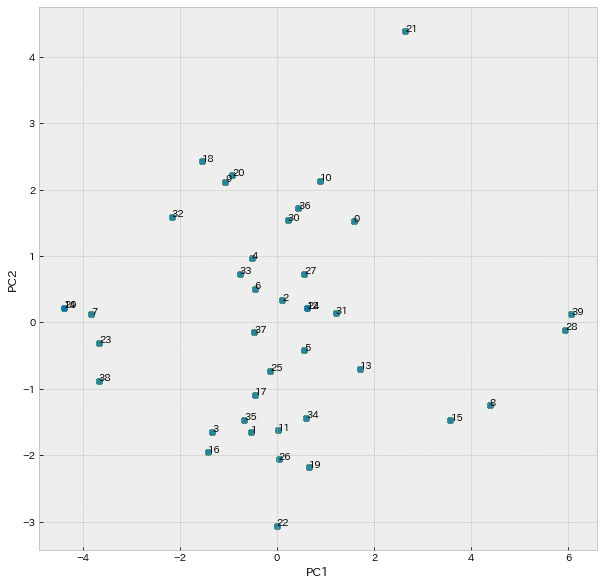

In [59]:
for x, y, name in zip(feature[:,0], feature[:,1], list(range(len(feature)))):
  plt.text(x,y,name)
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.scatter(feature[:,0], feature[:,1], alpha=0.8, cmap='Blues');

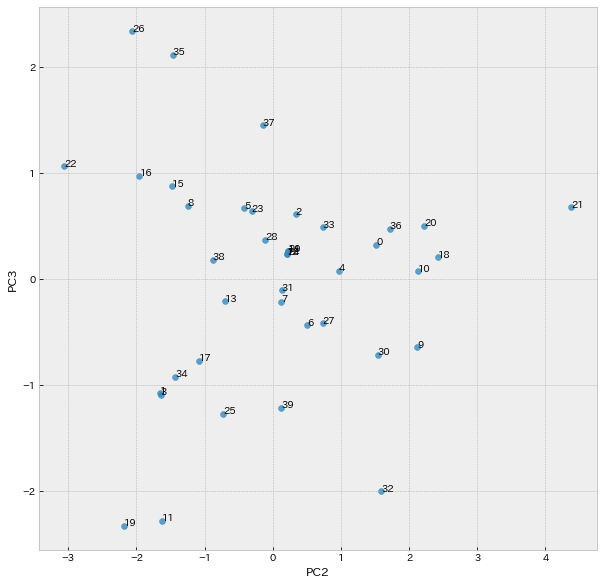

In [60]:
for x, y, name in zip(feature[:,1], feature[:, 2], list(range(len(feature)))):
    plt.text(x, y, name)

# x, y 軸の名前の追加
plt.xlabel('PC2')
plt.ylabel('PC3')

# 散布図の可視化
plt.scatter(feature[:, 1], feature[:, 2], alpha=0.8, cmap='Blues');

【質問】  
このグラフから読み取れることを考えてみましょう。

主成分分析を探索的に用いるメリット

ー＞可視化結果から新たな課題の発見や分析の切り口を見つけることができる